# 1. Pierwsza Klasteryzacja Spółek Giełdowych

## 1.1 Wczytanie danych

In [1]:
import pandas as pd
df=pd.read_excel(r'C:\Users\Andrzej\Projekt_1\formula.J.G.xlsx', sheet_name=0,
                 header=3, names=None, index_col=0, usecols="B:D")
print(df)

                               P/E (TTM)  ROE (TTM)
1 800 FLOWERS COM INC              25.66     0.0999
1&1 Drillisch AG                     NaN     0.0912
1ST SOURCE CORP                    15.30     0.1095
21st Century Fox                    4.38     0.4268
2U, Inc.                          -22.21    -0.0648
...                                  ...        ...
Zumiez Inc                         16.05     0.1317
Zynerba Pharmaceuticals, Inc.      -3.66    -0.5402
ZYNEX INC                            NaN        NaN
ZYNGA INC                         342.04     0.0097
NaN                                25.25        NaN

[2568 rows x 2 columns]


## 1.2 Czyszczenie danych

In [2]:
newDf=df.dropna( axis=0, how='any')
print(newDf)
with pd.ExcelWriter('formJG.xlsx') as writer: 
    newDf.to_excel(writer)


                               P/E (TTM)  ROE (TTM)
1 800 FLOWERS COM INC              25.66     0.0999
1ST SOURCE CORP                    15.30     0.1095
21st Century Fox                    4.38     0.4268
2U, Inc.                          -22.21    -0.0648
3D SYSTEMS CORP                   -28.07    -0.0880
...                                  ...        ...
Zovio Inc                         -11.79    -0.0272
Zscaler, Inc.                    -158.30    -0.0970
Zumiez Inc                         16.05     0.1317
Zynerba Pharmaceuticals, Inc.      -3.66    -0.5402
ZYNGA INC                         342.04     0.0097

[1692 rows x 2 columns]


## 1.3 Przeskalowanie cech przy wykorzystaniu mediany i rozstępu ćwiartkowego IQR

In [3]:
workDf=pd.read_excel(r'C:\Users\Andrzej\Projekt_1\formJG.xlsx',
                     sheet_name=0, header=0, names=None, usecols="B:C")
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler () . fit ( workDf )
workDf=transformer.transform (workDf)
print(workDf)

[[ 0.4259695   0.02390038]
 [ 0.0648366   0.06246234]
 [-0.31581699  1.33701546]
 ...
 [ 0.09098039  0.15163687]
 [-0.59607843 -2.54729865]
 [11.45446623 -0.33842137]]


In [4]:
data=workDf
workDf=pd.DataFrame({'C/Z': data[:, 0], 'ROE': data[:, 1]})
print (workDf)

            C/Z       ROE
0      0.425969  0.023900
1      0.064837  0.062462
2     -0.315817  1.337015
3     -1.242702 -0.637678
4     -1.446972 -0.730870
...         ...       ...
1687  -0.879477 -0.486644
1688  -5.986580 -0.767021
1689   0.090980  0.151637
1690  -0.596078 -2.547299
1691  11.454466 -0.338421

[1692 rows x 2 columns]


## 1.4 Dobór ilość klastrów metodą osypiska

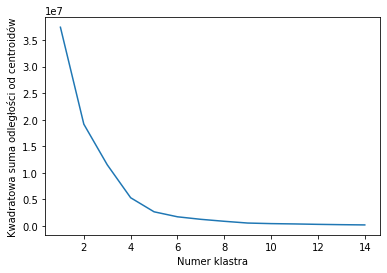

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=50).fit(workDf)
    workDf["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Numer klastra")
plt.ylabel("Kwadratowa suma odległości od centroidów")
plt.show()

## 1.5 K-Means
### K-Means z 5 klastrami

In [6]:
km= KMeans(n_clusters=5, max_iter=200).fit(workDf)
y_km = km.fit_predict(workDf)
km.labels_
X=workDf.values

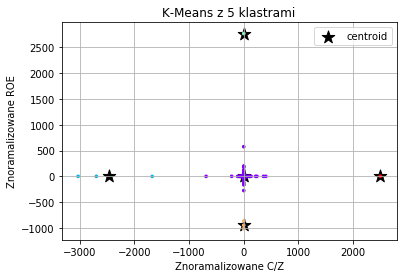

In [7]:
plt.scatter(    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=175, marker='*', c='black', label='centroid')
plt.scatter(X[:,0],X[:,1], c=km.labels_, cmap='rainbow',s=7)
plt.legend(scatterpoints=1)
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('K-Means z 5 klastrami') 
plt.grid() 
plt.show()

### Zbliżenie na "gęstszy" obszar

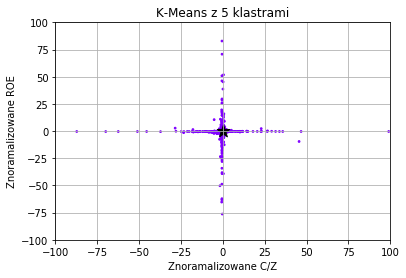

In [8]:
plt.scatter(X[:,0],X[:,1], c=km.labels_,label=km.labels_, 
            cmap='rainbow',s=3)
plt.scatter(    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=175, marker='*', c='black', label='centroids')
plt.xlim([-100,100])
plt.ylim([-100,100])
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('K-Means z 5 klastrami') 
plt.grid()
plt.show()

### K-Means z 9 klastrami

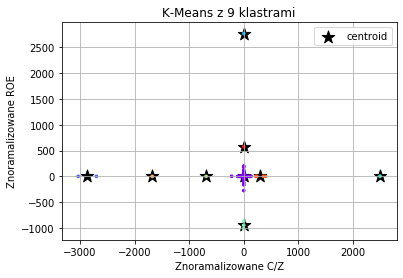

In [9]:
km= KMeans(n_clusters=9, max_iter=200).fit(workDf)
y_km = km.fit_predict(workDf)
km.labels_
plt.scatter(    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=175, marker='*', c='black', label='centroid')
plt.scatter(X[:,0],X[:,1], c=km.labels_, cmap='rainbow',s=7)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('K-Means z 9 klastrami') 
plt.show()

### Zbliżenie na "gęstszy" obszar

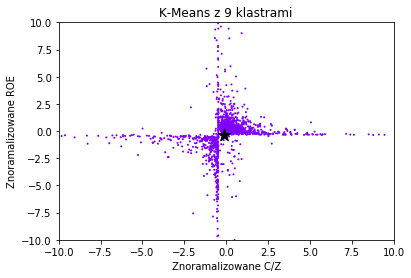

In [10]:
plt.scatter(X[:,0],X[:,1], c=km.labels_,label=km.labels_, cmap='rainbow',s=1)
plt.scatter(    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=175, marker='*', c='black', label='centroid')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('K-Means z 9 klastrami') 
plt.show()

## 1.6 K-Medoids 

In [11]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
# Ustawienie losowo początkowych medoidów
initial_medoids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Stworzenie instancji algorytmu K-Medoids
kmedoids_instance = kmedoids(data, initial_medoids)
# Uruchomienie algorytmu
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

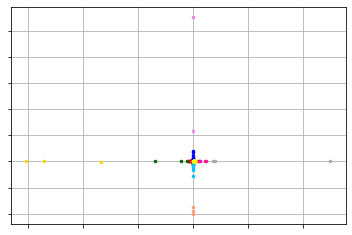

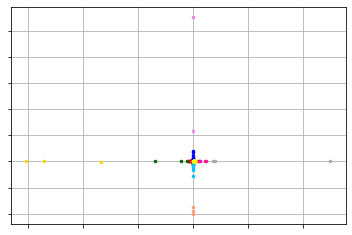

In [12]:
# Wizualizacja
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, data)
visualizer.show()

### Zbliżenie na „gęstszy” obszar

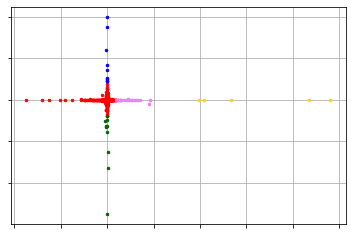

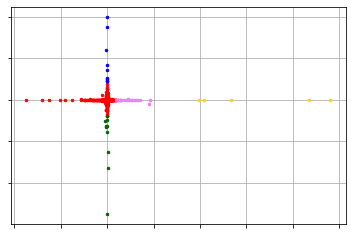

In [35]:
#wizualizacja tylko wiekszych klastrów
largeCluster=[[235, 0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 393, 394, 395, 396, 397, 398, 399, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 534, 535, 536, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 590, 591, 592, 593, 594, 595, 596, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 654, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 753, 754, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 778, 779, 780, 781, 782, 783, 785, 786, 787, 788, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 804, 805, 806, 807, 808, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 961, 962, 963, 964, 965, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1063, 1064, 1065, 1066, 1067, 1069, 1070, 1071, 1072, 1073, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690], [1068, 246, 400, 401, 789, 960, 1009, 1212, 1253], [1455, 109, 537, 752, 777, 784, 809, 830, 869, 1483, 1658], [310, 7, 501, 655, 1104], [1136, 15, 41, 311, 392, 437, 589, 653, 676, 704, 718, 803, 907, 933, 966, 1062, 1074, 1171, 1318, 1357, 1524, 1548, 1616, 1691]]
visualizer = cluster_visualizer()
visualizer.append_clusters(largeCluster, data)
visualizer.show()

## 1.7 GMM

### Kowariancja związana

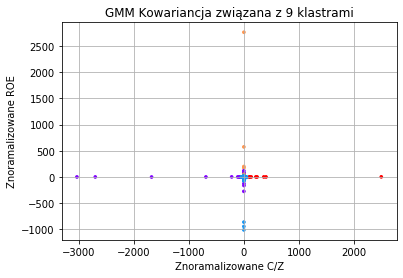

In [15]:
from sklearn.mixture import GaussianMixture
gmm= GaussianMixture(n_components=9, covariance_type='tied', n_init=100,
                     init_params='random').fit(workDf)
gmmLabels=gmm.predict(workDf)
plt.scatter(X[:,0],X[:,1], c=gmmLabels, cmap='rainbow',s=7)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('GMM Kowariancja związana z 9 klastrami') 
plt.show()

### Zbliżenie na „gęstszy” obszar

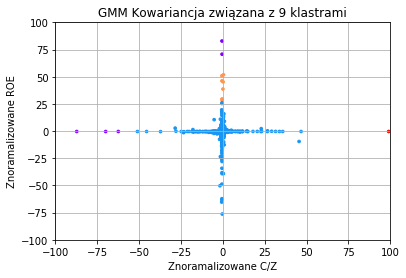

In [16]:
plt.scatter(X[:,0],X[:,1], c=gmmLabels, cmap='rainbow',s=7)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('GMM Kowariancja związana z 9 klastrami') 
plt.xlim([-100,100])
plt.ylim([-100,100])
plt.show()

### Kowariancja diagonalna

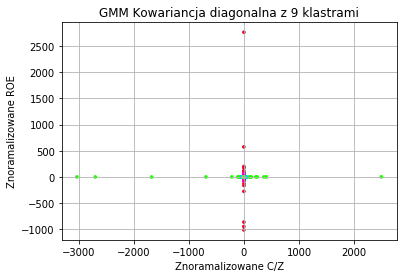

In [45]:
from sklearn.mixture import GaussianMixture
gmm= GaussianMixture(n_components=9, covariance_type='diag', 
                     n_init=100, init_params='random').fit(workDf)
gmmLabels=gmm.predict(workDf)
plt.scatter(X[:,0],X[:,1], c=gmmLabels, cmap='gist_rainbow',s=7)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('GMM Kowariancja diagonalna z 9 klastrami') 
plt.show()

### Zbliżenie na „gęstszy” obszar

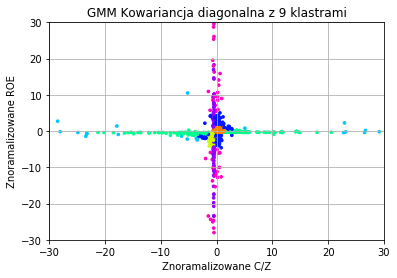

In [46]:
plt.scatter(X[:,0],X[:,1], c=gmmLabels, cmap='gist_rainbow',s=7)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('GMM Kowariancja diagonalna z 9 klastrami') 
plt.xlim([-30,30])
plt.ylim([-30,30])
plt.show()

### Kowariancja pełna

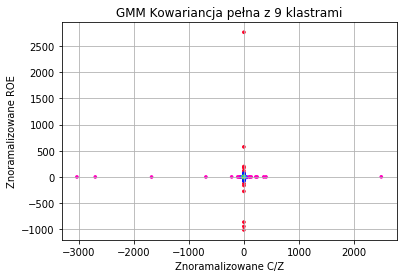

In [49]:
from sklearn.mixture import GaussianMixture
gmm= GaussianMixture(n_components=9, covariance_type='full',
                     n_init=100, init_params='random').fit(workDf)
gmmLabels=gmm.predict(workDf)
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('GMM Kowariancja pełna z 9 klastrami') 
plt.scatter(X[:,0],X[:,1], c=gmmLabels, cmap='gist_rainbow',s=7)
plt.grid()
plt.show()

### Zbliżenie na „gęstszy” obszar

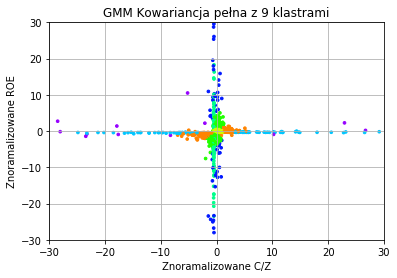

In [50]:
plt.scatter(X[:,0],X[:,1], c=gmmLabels, cmap='gist_rainbow',s=7)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('GMM Kowariancja pełna z 9 klastrami') 
plt.xlim([-30,30])
plt.ylim([-30,30])
plt.show()

### Kowariancja kulista

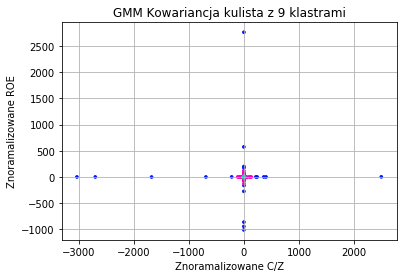

In [52]:
from sklearn.mixture import GaussianMixture
gmm= GaussianMixture(n_components=9, covariance_type='spherical', 
                     n_init=100, init_params='random').fit(workDf)
gmmLabels=gmm.predict(workDf)
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('GMM Kowariancja kulista z 9 klastrami') 
plt.scatter(X[:,0],X[:,1], c=gmmLabels, cmap='gist_rainbow',s=7)
plt.grid()
plt.show()

### Zbliżenie na „gęstszy” obszar

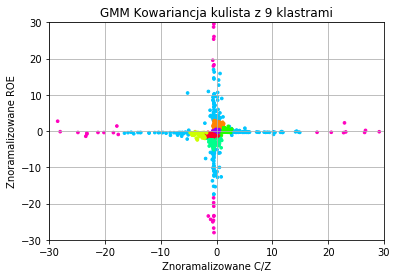

In [53]:
plt.scatter(X[:,0],X[:,1], c=gmmLabels, cmap='gist_rainbow',s=7)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('GMM Kowariancja kulista z 9 klastrami') 
plt.xlim([-30,30])
plt.ylim([-30,30])
plt.show()

## 1.8 OPTICS

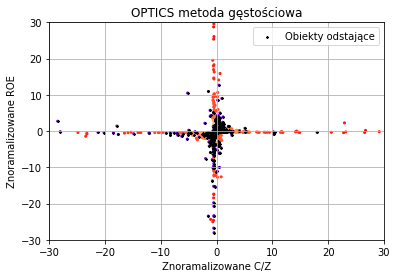

In [23]:
from sklearn.cluster import OPTICS
op=OPTICS(min_samples=3,  metric='euclidean', 
          algorithm='ball_tree').fit(workDf)
y_km = op.fit_predict(workDf)
plt.scatter(X[:,0],X[:,1], c=op.labels_, cmap='rainbow',s=4)
plt.scatter(X[y_km == -1, 0], X[y_km == -1, 1], s=3, c='black',
            label='Obiekty odstające', marker='x')
plt.grid()
plt.legend(scatterpoints=1)
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('OPTICS metoda gęstościowa') 
plt.xlim([-30,30])
plt.ylim([-30,30])
plt.show()

### Zbliżenie na „gęstszy” obszar

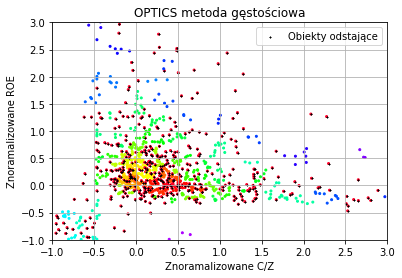

In [24]:
plt.scatter(X[:,0],X[:,1], c=op.labels_, cmap='gist_rainbow',s=4)
plt.scatter(X[y_km == -1, 0], X[y_km == -1, 1], s=1, c='black',
            label='Obiekty odstające', marker='x')
plt.grid()
plt.legend(scatterpoints=1)
plt.xlim([-1,3])
plt.ylim([-1,3])
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('OPTICS metoda gęstościowa') 
plt.show()

## 1.9 Metoda hierarchiczna wiązanie Warda 

### Wskaźnik Kaufmanna-Rousseeuwa

In [8]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
for k in range(1, 25):
    ward = AgglomerativeClustering(n_clusters=None, linkage='ward',
                                   compute_full_tree=True,
                                   distance_threshold=k).fit(workDf)
    labels=ward.labels_
    print(k,metrics.silhouette_score(X, labels, metric='euclidean'))

1 0.3387848950953641
2 0.3517511134803705
3 0.343463252889458
4 0.3397925229829354
5 0.3422445167559909
6 0.3373160903453086
7 0.33902704423173513
8 0.3488858915127372
9 0.34798100181034275
10 0.36873276124761156
11 0.3689920255641976
12 0.3740831026312707
13 0.37506772166476765
14 0.48125529202953826
15 0.48249571522524737
16 0.4822831637329388
17 0.4822831637329388
18 0.4822831637329388
19 0.4783662663348257
20 0.4971352108242523
21 0.49277169944391697
22 0.49308760451611744
23 0.49308760451611744
24 0.4939785796936147


### Próg dystansu równy 2

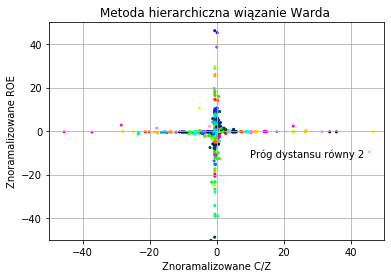

In [54]:
ward = AgglomerativeClustering(n_clusters=None, linkage='ward',
                               compute_full_tree=True,
                               distance_threshold=2).fit(workDf)
plt.scatter(X[:,0],X[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('Metoda hierarchiczna wiązanie Warda ')
plt.annotate('Próg dystansu równy 2', xy=(2, 1), xytext=(10, -12))
plt.xlim([-50,50])
plt.ylim([-50,50])
plt.show()

### Zbliżenie na „gęstszy” obszar

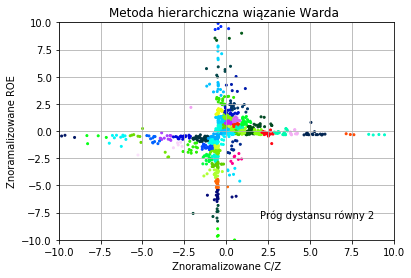

In [55]:
plt.scatter(X[:,0],X[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('Metoda hierarchiczna wiązanie Warda ')
plt.annotate('Próg dystansu równy 2', xy=(2, 1), xytext=(2, -8))
plt.show()

### Próg dystansu równy 5

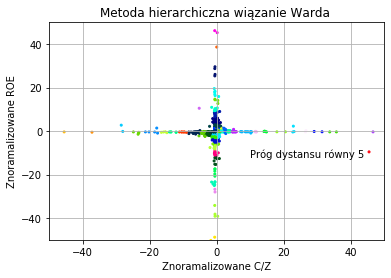

In [56]:
ward = AgglomerativeClustering(n_clusters=None, linkage='ward',
                               compute_full_tree=True,
                               distance_threshold=5).fit(workDf)
plt.scatter(X[:,0],X[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('Metoda hierarchiczna wiązanie Warda ')
plt.annotate('Próg dystansu równy 5', xy=(2, 1), xytext=(10, -12))
plt.xlim([-50,50])
plt.ylim([-50,50])
plt.show()

### Zbliżenie na „gęstszy” obszar

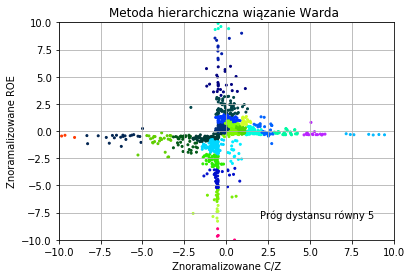

In [57]:
plt.scatter(X[:,0],X[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('Metoda hierarchiczna wiązanie Warda ')
plt.annotate('Próg dystansu równy 5', xy=(2, 1), xytext=(2, -8))
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

### Próg dystansu równy 20

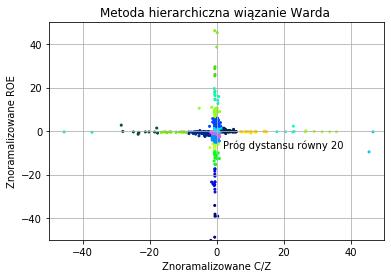

In [58]:
ward = AgglomerativeClustering(n_clusters=None, linkage='ward',
                               compute_full_tree=True,
                               distance_threshold=20).fit(workDf)
plt.scatter(X[:,0],X[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('Metoda hierarchiczna wiązanie Warda ')
plt.annotate('Próg dystansu równy 20', xy=(2, 1), xytext=(2, -8))
plt.xlim([-50,50])
plt.ylim([-50,50])
plt.show()

### Zbliżenie na „gęstszy” obszar

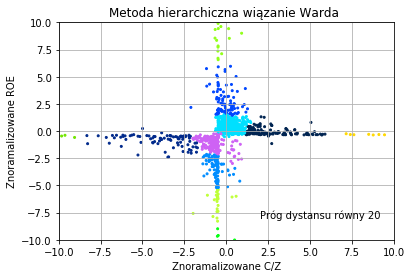

In [59]:
plt.scatter(X[:,0],X[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.xlabel('Znoramalizowane C/Z') 
plt.ylabel('Znoramalizowane ROE')
plt.title('Metoda hierarchiczna wiązanie Warda ')
plt.annotate('Próg dystansu równy 20', xy=(2, 1), xytext=(2, -8))
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

## 1.10 Wynik

### Zestawienie wskażników jakości

In [20]:
ward2 = AgglomerativeClustering(n_clusters=None, linkage='ward',
                               compute_full_tree=True,
                               distance_threshold=2).fit(workDf)
ward5 = AgglomerativeClustering(n_clusters=None, linkage='ward',
                               compute_full_tree=True,
                               distance_threshold=5).fit(workDf)
mch2=metrics.calinski_harabasz_score(X, ward2.labels_)
mss2=metrics.silhouette_score(X, ward2.labels_)
mdb2=metrics.davies_bouldin_score(X, ward2.labels_)
mch5=metrics.calinski_harabasz_score(X, ward5.labels_)
mss5=metrics.silhouette_score(X, ward5.labels_)
mdb5=metrics.davies_bouldin_score(X, ward5.labels_)
dfScores=pd.DataFrame({'Próg D.':[2,5],
                       'W. Calińskego-Harabasza':[mch2,mch5], 
                       'W. Sylwetki':[mss2,mss5] ,
                       'W.Daviesa-Bouldina': [mdb2,mdb5]})
print(dfScores)

   Próg D.  W. Calińskego-Harabasza  W. Sylwetki  W.Daviesa-Bouldina
0        2             3.185286e+06     0.351751            0.420511
1        5             1.585849e+06     0.342245            0.358025


### Zestawienie wyników po odwróconej transformacji na płaszczyźnie
### Próg dystansu równy 2

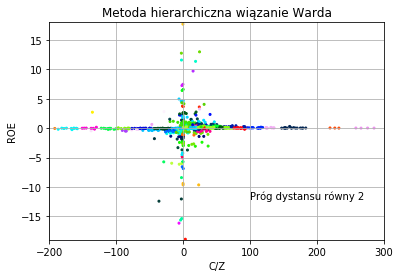

In [25]:
ward = AgglomerativeClustering(n_clusters=None, linkage='ward',
                               compute_full_tree=True,
                               distance_threshold=2).fit(workDf)

Xit=transformer.inverse_transform(workDf)
plt.scatter(Xit[:,0],Xit[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.xlim([-200,300])
plt.ylim([-19,18])
plt.xlabel('C/Z')
plt.ylabel('ROE')
plt.title('Metoda hierarchiczna wiązanie Warda')
plt.annotate('Próg dystansu równy 2', xy=(2, 1), xytext=(100, -12))
plt.show()

### Zbliżenie na „gęstszy” obszar

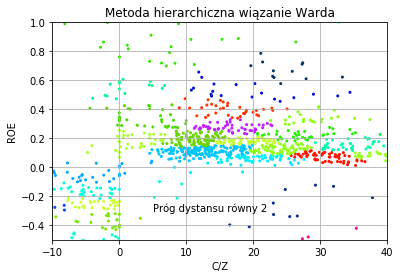

In [26]:
plt.scatter(Xit[:,0],Xit[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.xlim([-10,40])
plt.ylim([-0.5,1])
plt.xlabel('C/Z')
plt.ylabel('ROE')
plt.title('Metoda hierarchiczna wiązanie Warda')
plt.annotate('Próg dystansu równy 2', xy=(2, 1), xytext=(5, -0.3))
plt.show()

### Przeskalowany układ współrzędnych

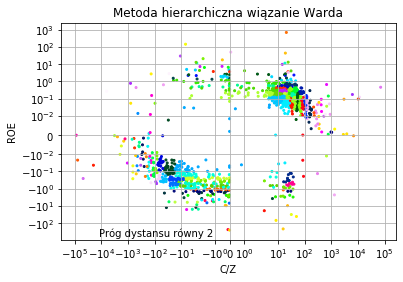

In [27]:
plt.scatter(Xit[:,0],Xit[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.yscale('symlog', linthreshy=0.01)
plt.xscale('symlog', linthreshy=0.01)
plt.xlabel('C/Z')
plt.ylabel('ROE')
plt.title('Metoda hierarchiczna wiązanie Warda')
plt.annotate('Próg dystansu równy 2', xy=(2, 1), xytext=(-12000, -550))
plt.show()

### Próg dystansu równy 5

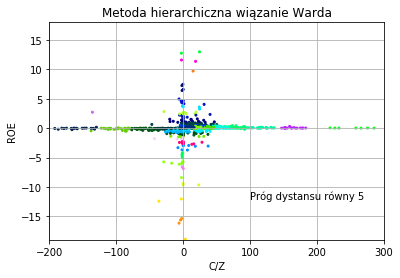

In [28]:
ward = AgglomerativeClustering(n_clusters=None, linkage='ward',
                               compute_full_tree=True,
                               distance_threshold=5).fit(workDf)
Xit=transformer.inverse_transform(workDf)
plt.scatter(Xit[:,0],Xit[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.xlim([-200,300])
plt.ylim([-19,18])
plt.xlabel('C/Z')
plt.ylabel('ROE')
plt.title('Metoda hierarchiczna wiązanie Warda')
plt.annotate('Próg dystansu równy 5', xy=(2, 1), xytext=(100, -12))
plt.show()

### Zbliżenie na „gęstszy” obszar

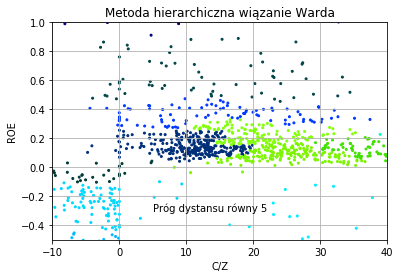

In [31]:
plt.scatter(Xit[:,0],Xit[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.xlim([-10,40])
plt.ylim([-0.5,1])
plt.xlabel('C/Z')
plt.ylabel('ROE')
plt.title('Metoda hierarchiczna wiązanie Warda')
plt.annotate('Próg dystansu równy 5', xy=(2, 1), xytext=(5, -0.3))
plt.show()

### Przeskalowany układ współrzędnych

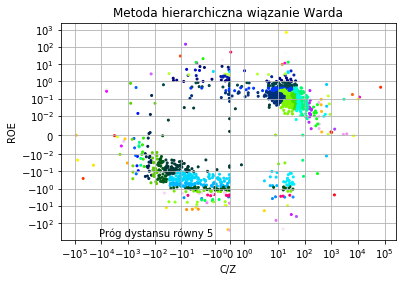

In [30]:
plt.scatter(Xit[:,0],Xit[:,1], c=ward.labels_, cmap='gist_ncar',s=4)
plt.grid()
plt.yscale('symlog', linthreshy=0.01)
plt.xscale('symlog', linthreshy=0.01)
plt.xlabel('C/Z')
plt.ylabel('ROE')
plt.title('Metoda hierarchiczna wiązanie Warda')
plt.annotate('Próg dystansu równy 5', xy=(2, 1), xytext=(-12000, -550))
plt.show()

### Rezultat

In [50]:
ward = AgglomerativeClustering(n_clusters=None, linkage='ward',
                               compute_full_tree=True,
                               distance_threshold=2).fit(workDf)
dfResult=newDf
dfResult['Clust']=ward.labels_
dfResult=dfResult.sort_values(by='Clust')
with pd.ExcelWriter('resultFormula.J.G.wsk.xlsx') as writer: 
    dfResult.to_excel(writer)
print(dfResult)

                              P/E (TTM)  ROE (TTM)  Clust
COTT CORP /CN/                   982.78     0.0016      0
MATRIX SERVICE CO               1039.97     0.0014      0
MONSTER WORLDWIDE, INC.           -1.23    -1.3991      1
ACCURIDE CORP                     -2.70    -1.3006      1
ADIAL PHARMACEUTICALS, INC.       -0.78    -1.4191      1
...                                 ...        ...    ...
CLARCOR INC.                   11537.55     0.1221    139
BeiGene, Ltd.                   -137.60    -0.4542    140
OptimizeRx Corp                  603.00     0.0123    141
Camping World Holdings, Inc.     -28.77     2.8161    142
Fellazo Corp                   -6352.61     0.2669    143

[1692 rows x 3 columns]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
